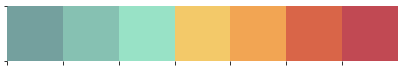

In [1]:
# Regular Imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from tabulate import tabulate
import missingno as msno 
from IPython.display import display_html
from PIL import Image
import gc
import cv2
from scipy.stats import pearsonr

import pydicom # for DICOM images
from skimage.transform import resize
import copy
import re

# Segmentation
from glob import glob
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *
init_notebook_mode(connected=True) 

import warnings
warnings.filterwarnings("ignore")


# Set Color Palettes for the notebook
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
path=r"D:\Computer Science\Artifical Intelligence\Datasets\osic-pulmonary-fibrosis-progression"

In [3]:
plt.rc('xtick',labelsize=11)
plt.rc('ytick',labelsize=11)

In [2]:
data=pd.read_csv(path+"\\train.csv")

In [17]:
data[data["Patient"]=="ID00007637202177411956430"]

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
5,ID00007637202177411956430,17,2101,52.868646,79,Male,Ex-smoker
6,ID00007637202177411956430,29,2000,50.327126,79,Male,Ex-smoker
7,ID00007637202177411956430,41,2064,51.937594,79,Male,Ex-smoker
8,ID00007637202177411956430,57,2057,51.761449,79,Male,Ex-smoker


In [15]:
len(data['Patient'].unique())

176

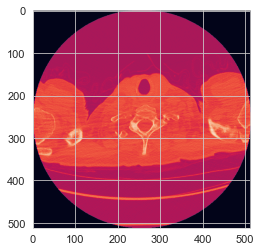

In [18]:
image_path = path+'\\train\\ID00007637202177411956430\\1.dcm'
ds =pydicom.dcmread(image_path)
plt.imshow( ds.pixel_array)
plt.show()

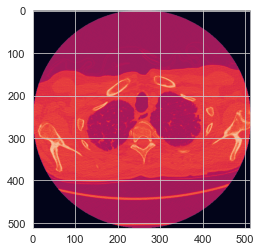

In [20]:
image_path = path+'\\train\\ID00007637202177411956430\\5.dcm'
ds =pydicom.dcmread(image_path)
plt.imshow( ds.pixel_array)
plt.show()

### Extracting Information from .dcm files and Converting  to jpg

In [ ]:
# make it True if you want in PNG format
PNG = False
# Specify the .dcm folder path
folder_path = "stage_1_test_images"
# Specify the .jpg/.png folder path
jpg_folder_path = "JPG_test"
images_path = os.listdir(folder_path)
# list of attributes available in dicom image
# download this file from the given link # https://github.com/vivek8981/DICOM-to-JPG
dicom_image_description = pd.read_csv("dicom_image_description.csv")

with open('Patient_Detail.csv', 'w', newline ='') as csvfile:
    fieldnames = list(dicom_image_description["Description"])
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(fieldnames)
    for n, image in enumerate(images_path):
        ds = dicom.dcmread(os.path.join(folder_path, image))
        rows = []
        pixel_array_numpy = ds.pixel_array
        if PNG == False:
            image = image.replace('.dcm', '.jpg')
        else:
            image = image.replace('.dcm', '.png')
        cv2.imwrite(os.path.join(jpg_folder_path, image), pixel_array_numpy)
        if n % 50 == 0:
            print('{} image converted'.format(n))
        for field in fieldnames:
            if ds.data_element(field) is None:
                rows.append('')
            else:
                x = str(ds.data_element(field)).replace("'", "")
                y = x.find(":")
                x = x[y+2:]
                rows.append(x)
        writer.writerow(rows)